In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


data = pd.read_csv(r"../data/train.csv")
del data['Id']

X = data.loc[:, data.columns != 'Cover_Type'].values
Y = data['Cover_Type'].values

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# utils
def k_fold(k, X, Y):
    test_size = len(Y) // k
    selection = np.random.permutation(len(Y))
    test_x = X[selection[:test_size]]
    test_y = Y[selection[:test_size]]
    train_x = X[selection[test_size:]]
    train_y = Y[selection[test_size:]]
    return (train_x, train_y), (test_x, test_y)

def precision_recall(Y, Y_pred):
    classes, frequencies = np.unique(Y, return_counts=True)
    tp_fp_per_class = {c:[0, 0] for c in classes}
    for y, y_pred in zip(Y, Y_pred):
        if y == y_pred:
            # true positive
            tp_fp_per_class[y_pred][0] += 1
        else:
            # false positive
            tp_fp_per_class[y_pred][1] += 1
    return {c:[
                tp_fp_per_class[c][0] / sum(tp_fp_per_class[c]),
                tp_fp_per_class[c][0] / counter
            ] 
            for c, counter in zip(classes, frequencies)
           }

def plot_precision_recall(pr):
    fig, ax = plt.subplots()
    index = np.arange(len(pr))
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, [v[0] for v in pr.values()], bar_width,
    alpha=opacity,
    color='b',
    label='Precision')

    rects2 = plt.bar(index + bar_width, [v[1] for v in pr.values()], bar_width,
    alpha=opacity,
    color='g',
    label='Recall')

    plt.xlabel('Class')
    plt.ylabel('Percent')
    plt.title('Precision Recall')
    plt.xticks(index + bar_width, [str(c) for c in pr])
    plt.legend()

    plt.tight_layout()

from scikitplot.metrics import plot_confusion_matrix

Decision tree precision: 0.5976


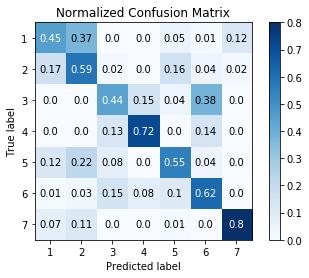

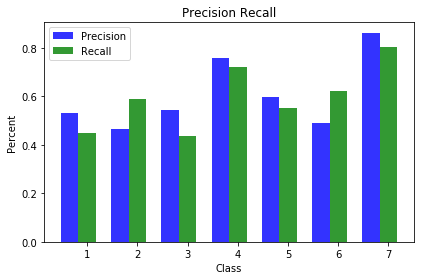

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
_X = X[:, 10:]
(train_x, train_y), (test_x, test_y) = k_fold(5, _X, Y)

dtree = DecisionTreeClassifier()
dtree.fit(train_x, train_y)
print("Decision tree precision: %.4f" % (dtree.score(test_x, test_y), ))
test_y_pred = dtree.predict(test_x)

plot_confusion_matrix(test_y, test_y_pred, normalize=True)
plot_precision_recall(precision_recall(test_y, test_y_pred))

In [37]:
from os import environ, pathsep
environ["PATH"] += pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)

graph.render()

'Source.gv.pdf'

Naive Bayes accuracy 0.5870


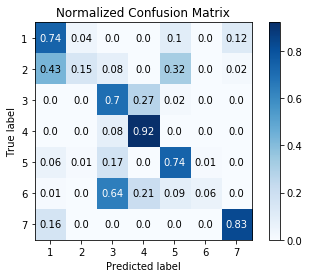

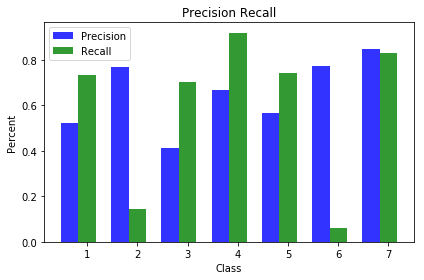

In [38]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

_X = X[:, :]
(train_x, train_y), (test_x, test_y) = k_fold(5, _X, Y)
# TODO pca 
gnb = GaussianNB()
gnb.fit(train_x, train_y)
print("Naive Bayes accuracy %.4f" % (gnb.score(test_x, test_y), ))

test_y_pred = gnb.predict(test_x)
plot_confusion_matrix(test_y, test_y_pred, normalize=True)
plot_precision_recall(precision_recall(test_y, test_y_pred))

kNN accuracy: 0.7718


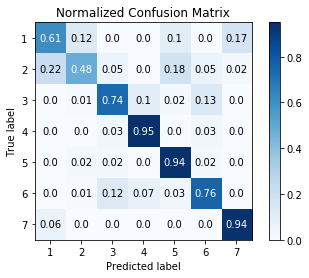

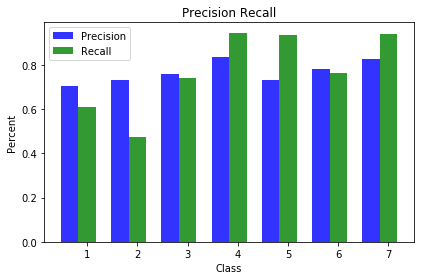

In [39]:
from sklearn.neighbors import KNeighborsClassifier

(train_x, train_y), (test_x, test_y) = k_fold(5, X, Y)

# TODO optimizare neighb.
nn = KNeighborsClassifier(n_neighbors=10)
nn.fit(train_x, train_y)

print("kNN accuracy: %.4f" % (nn.score(test_x, test_y)))
test_y_pred = nn.predict(test_x)
plot_confusion_matrix(test_y, test_y_pred, normalize=True)
plot_precision_recall(precision_recall(test_y, test_y_pred))

Epoch 1/10
12096/12096 [==============================] - 4s 295us/step - loss: 1.0459 - acc: 0.5752
Epoch 2/10
12096/12096 [==============================] - 1s 116us/step - loss: 0.8460 - acc: 0.6470
Epoch 3/10
12096/12096 [==============================] - 1s 112us/step - loss: 0.8063 - acc: 0.6617
Epoch 4/10
12096/12096 [==============================] - 1s 117us/step - loss: 0.7769 - acc: 0.6761
Epoch 5/10
12096/12096 [==============================] - 1s 113us/step - loss: 0.7547 - acc: 0.6824
Epoch 6/10
12096/12096 [==============================] - 1s 110us/step - loss: 0.7403 - acc: 0.6919
Epoch 7/10
12096/12096 [==============================] - 1s 105us/step - loss: 0.7325 - acc: 0.6960
Epoch 8/10
12096/12096 [==============================] - 1s 108us/step - loss: 0.7192 - acc: 0.6992
Epoch 9/10
12096/12096 [==============================] - 1s 118us/step - loss: 0.7038 - acc: 0.7109
Epoch 10/10
3024/3024 [==============================] - 1s 233us/step
Neural network accur

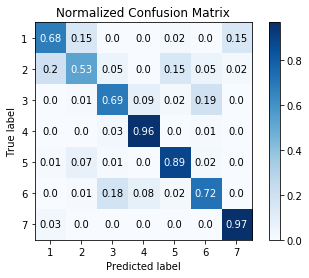

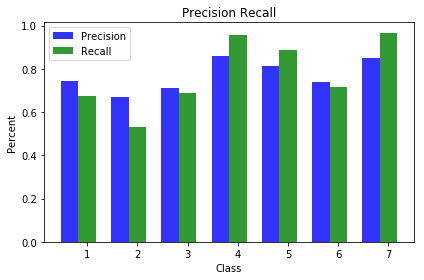

In [40]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, ReLU, ELU
from keras.utils import to_categorical
from sklearn.decomposition import PCA

# :10 approx 73 % accuracy on test set
# [0, 1, 2, 3, 4, 5, 9] approx 75 % accuracy on test set
# [0, 1, 2, 3, 5, 9] approx 73.5 % accuracy on test set
# [0, 1, 2, 3, 4, 5, 7, 9] approx 71 % accuracy on test set

pca = PCA(n_components=7)
_X = X[:, :10].astype(np.float64)
pca_components = pca.fit(_X).components_
# _X = _X.dot(pca_components.T)
_X = (_X - np.mean(_X, axis=0))
_X = _X / np.std(_X, axis=0)


np.random.seed(10);
(train_x, train_y), (test_x, test_y) = k_fold(5, _X, Y)

# testing on test set -- not so good result; TODO see why?
# test_x = _X
# test_y = Y

# test_data = pd.read_csv(r"../data/test.csv")
# labels = {t[0]:t[1] for t in pd.read_csv(r"../data/sampleSubmission.csv").values}

# train_y = np.array([labels[_id] for _id in test_data['Id'].values], dtype=np.uint8)
# del test_data['Id']
# train_x = test_data.loc[:, :].values
# train_x = train_x[:, :10].astype(np.float64)
# train_x = train_x - np.mean(train_x, axis=0)
# test_x = test_x.dot(pca_components.T)

classes = 7
train_y = to_categorical(train_y - 1, classes)  # label in [1, 7] => -1
test_y = to_categorical(test_y - 1, classes)  # label in [1, 7] => -1

model = Sequential([
    Dense(units=128, input_shape=(train_x.shape[1], )),
    BatchNormalization(),
    ReLU(),
    Dense(units=96),
    BatchNormalization(),
    ReLU(),
    Dense(units=48),
    BatchNormalization(),
    ReLU(),
    Dense(units=7, activation="softmax"),
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10, batch_size=32)

print("Neural network accuracy: %.4f" % (model.evaluate(test_x, test_y, batch_size=16)[1], ))
test_y_pred = np.argmax(model.predict(test_x), axis=1) + 1
test_y = np.argmax(test_y, axis=1) + 1
plot_confusion_matrix(test_y, test_y_pred, normalize=True)
plot_precision_recall(precision_recall(test_y, test_y_pred))